### KMeans Clustering using Cricket Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"Cricket.csv", encoding='latin')

In [3]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df.shape

(79, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
# No duplicate values in the dataset.

In [9]:
df.isna().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [10]:
# No null values present in dataset.

In [11]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


# Exploratory Data Analysis:

In [12]:
df[['Start','End']] = df.Span.str.split('-', expand=True)

In [13]:
# By the Span column we can get the experiance of a Player.

In [14]:
df[['Start','End']] = df[['Start','End']].astype(int)
df['Exp']= df['End']-df['Start']
df=df.drop(['Span','Start','End'], axis=1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


### Univariate Analysis:

In [15]:
# Match played by the Player.

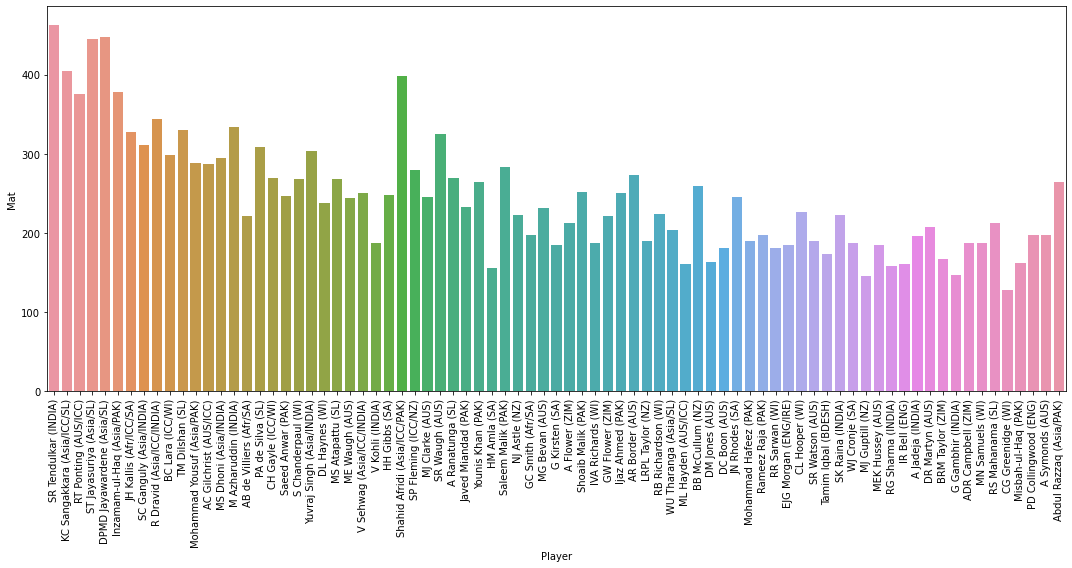

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Player'],y=df['Mat'],data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

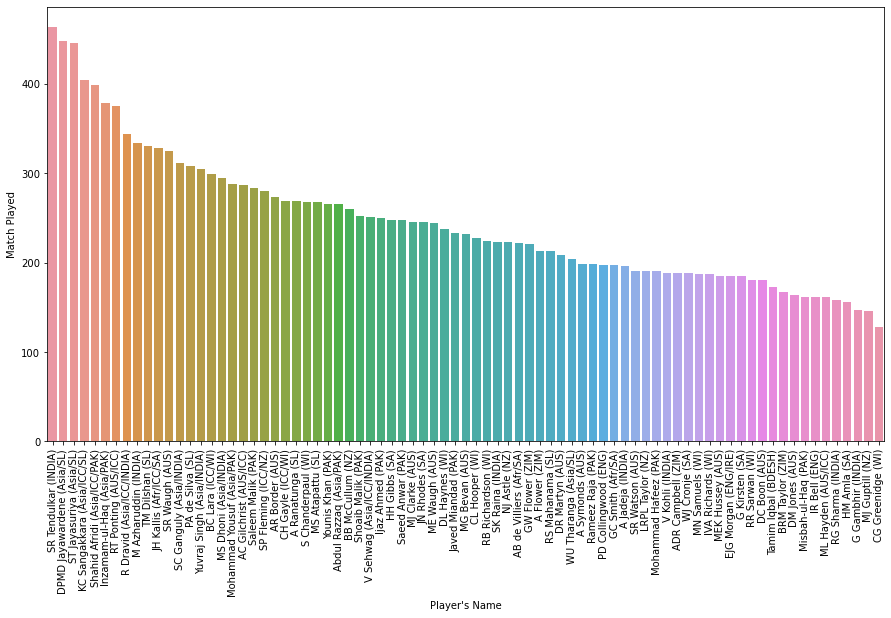

In [17]:
# Or we can also plot in order.
plt.figure(figsize=(15,8))
mat=df[['Player','Mat']].sort_values('Mat',ascending=False)
sns.barplot(data=mat, x='Player',y='Mat')
plt.xlabel("Player's Name")
plt.ylabel("Match Played")
plt.xticks(rotation=90)
plt.show()

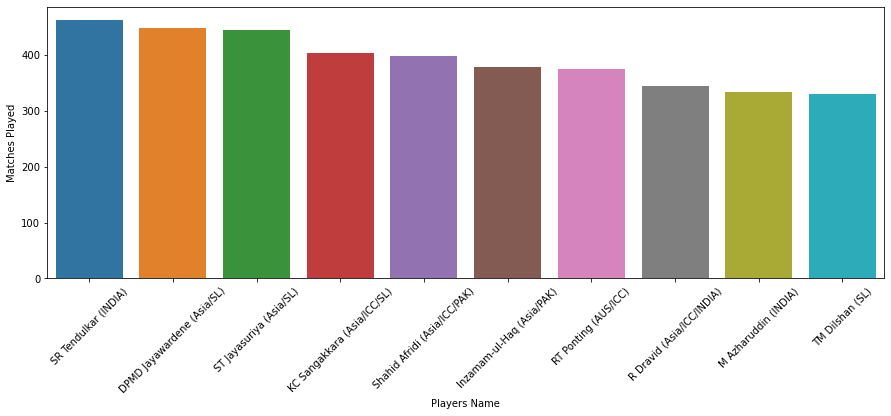

In [18]:
# Top 10 Player:

plt.figure(figsize=(15,5))
mat_top_10 = df[['Player','Mat']].sort_values('Mat', ascending=False).head(10)
sns.barplot(x='Player',y='Mat', data=mat_top_10)
plt.xlabel('Players Name')
plt.ylabel('Matches Played')
plt.xticks(rotation=45)
plt.show()

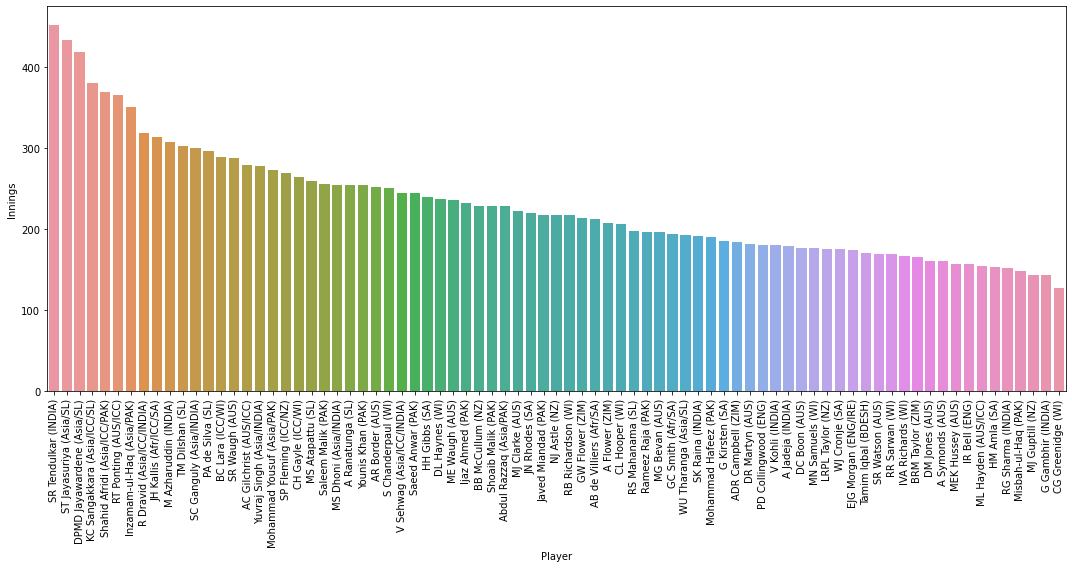

In [19]:
# Batsman Innings:

plt.figure(figsize=(15,8))
bats_inns=df[['Player','Inns']].sort_values('Inns', ascending=False)
sns.barplot(x='Player',y='Inns',data=bats_inns)
plt.xlabel('Player')
plt.ylabel('Innings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

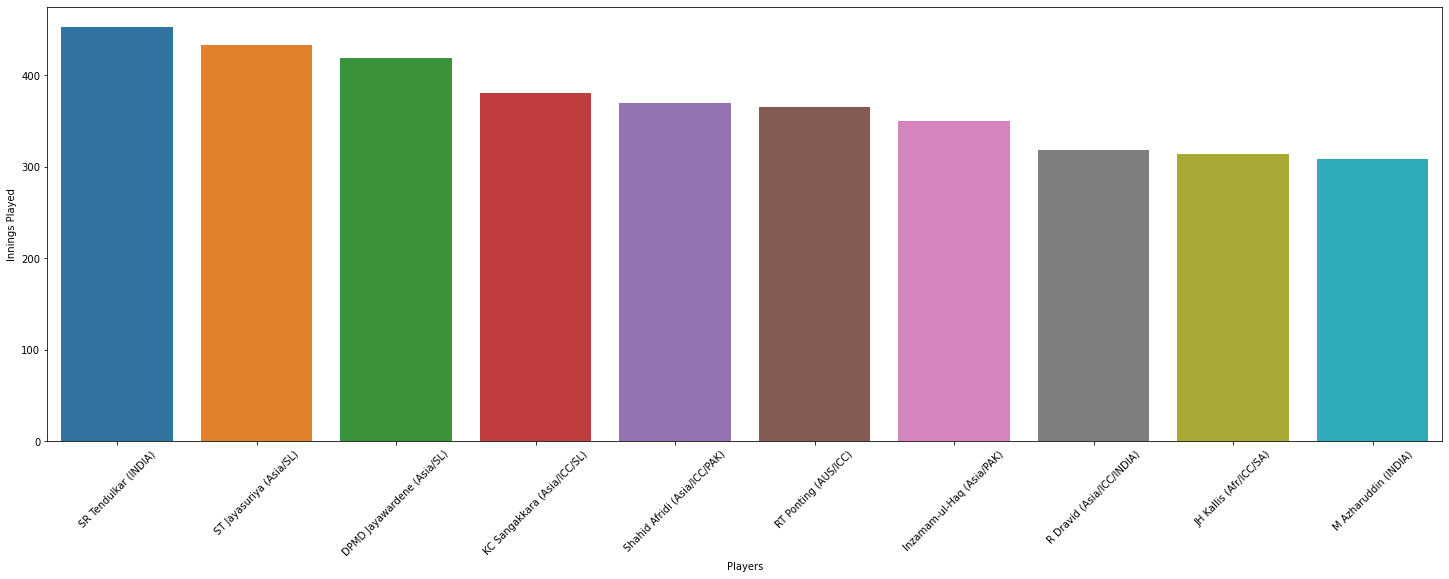

In [20]:
# Top 10 Players Innings:

plt.figure(figsize=(25,8))
inns_top10= df[['Player','Inns']].sort_values('Inns', ascending=False).head(10)
sns.barplot(x='Player',y='Inns',data=inns_top10)
plt.xlabel('Players')
plt.ylabel('Innings Played')
plt.xticks(rotation=45)
plt.show()

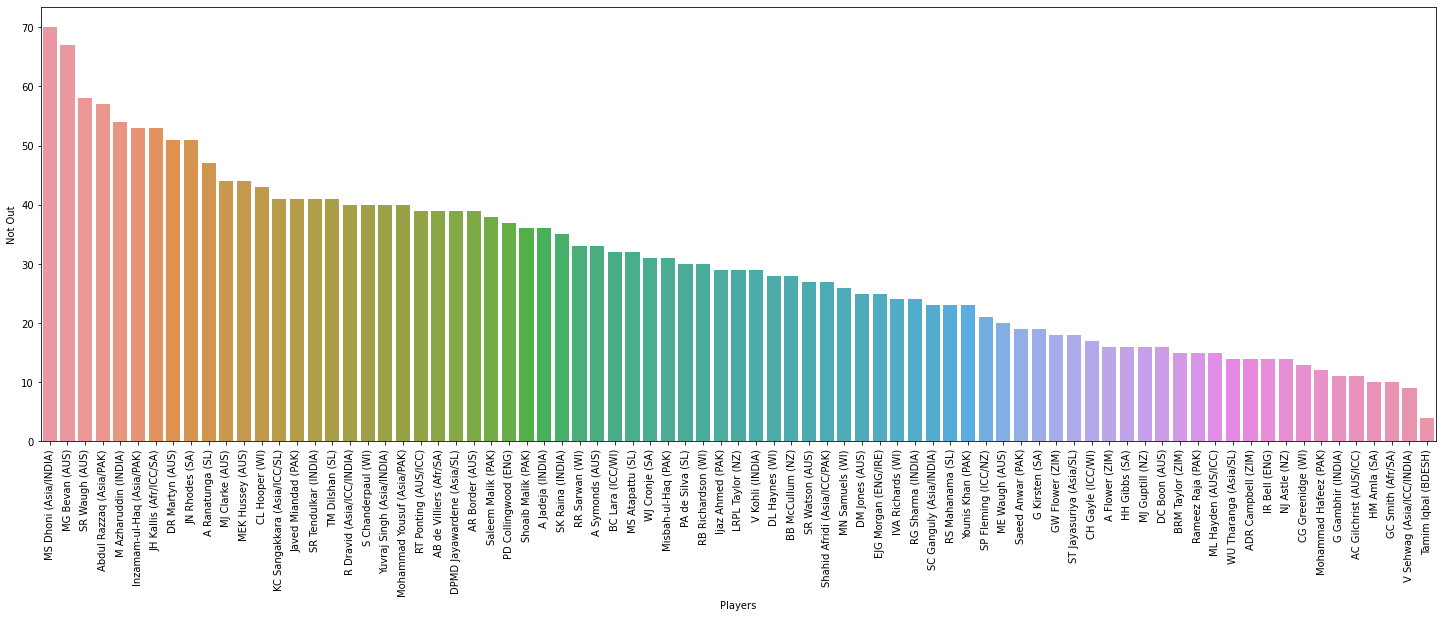

In [21]:
# NO--> Not Out
# Not out for All basman:
plt.figure(figsize=(25,8))
bats_NO= df[['Player','NO']].sort_values('NO', ascending=False)
sns.barplot(x='Player',y='NO', data=bats_NO)
plt.xlabel('Players')
plt.ylabel('Not Out')
plt.xticks(rotation=90)
plt.show()

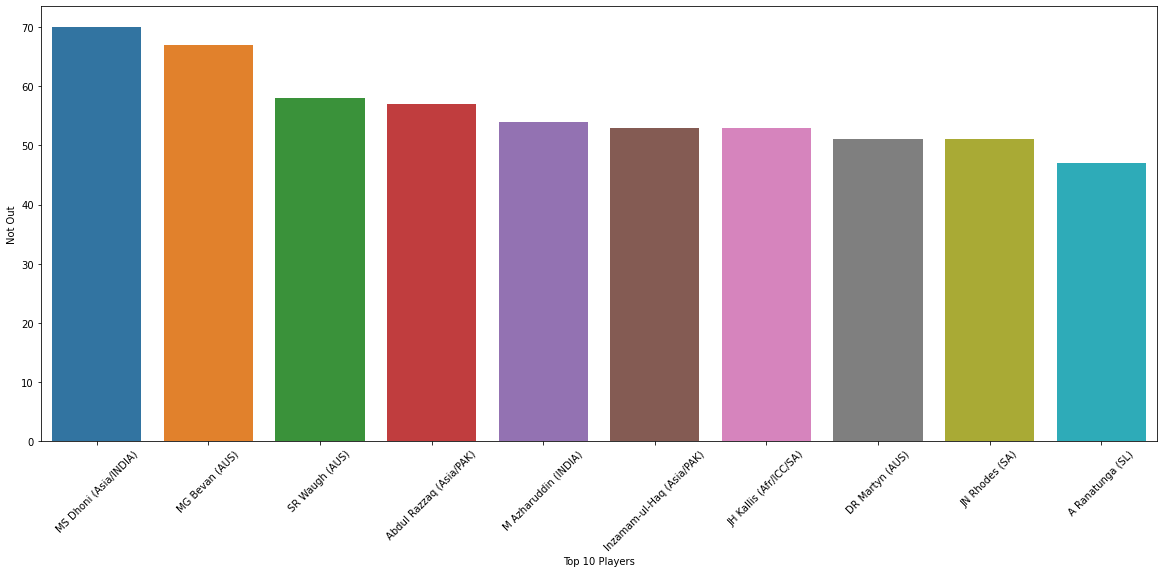

In [22]:
plt.figure(figsize=(20,8))
top10_NO_bats= df[['Player','NO']].sort_values('NO', ascending=False).head(10)
sns.barplot(x='Player',y='NO',data=top10_NO_bats)
plt.xlabel('Top 10 Players')
plt.ylabel('Not Out')
plt.xticks(rotation=45)
plt.show()

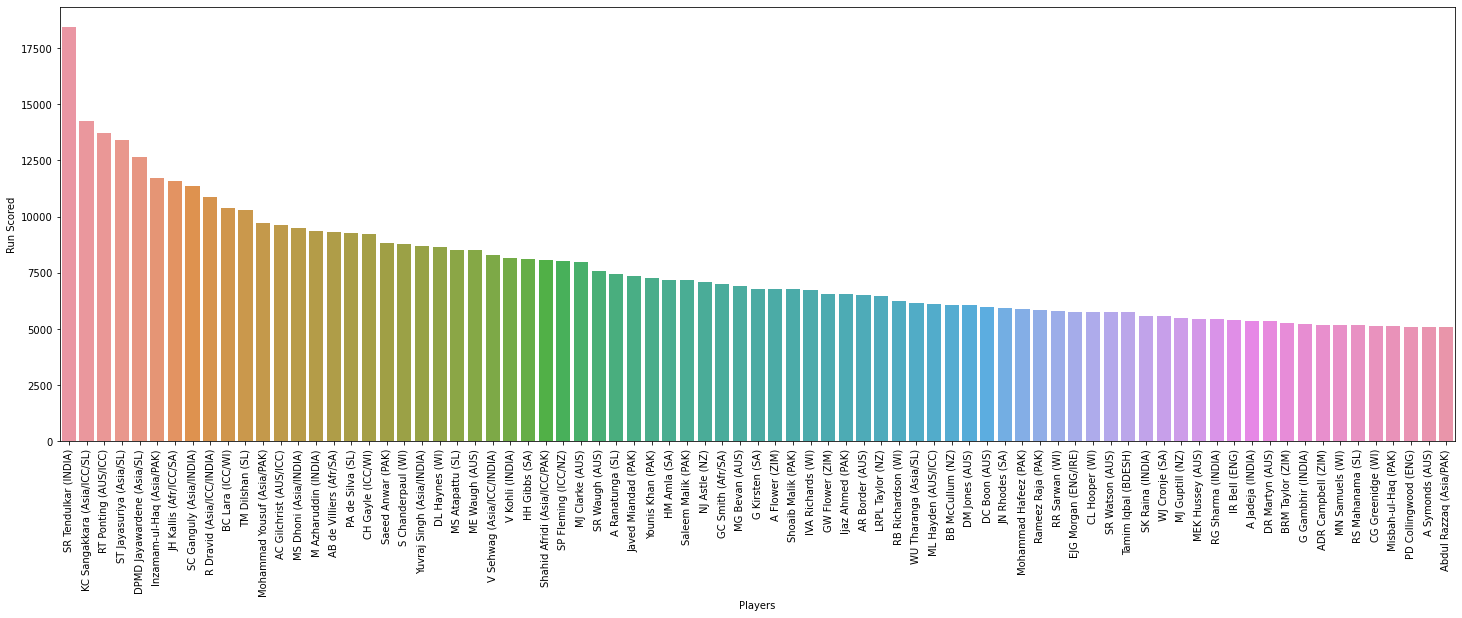

In [23]:
#All batsman run scored
plt.figure(figsize=(25,8))
run=df[['Player','Runs']].sort_values('Runs',ascending=False)
sns.barplot(x='Player',y='Runs',data=run)
plt.xlabel('Players')
plt.ylabel('Run Scored')
plt.xticks(rotation=90)
plt.show()

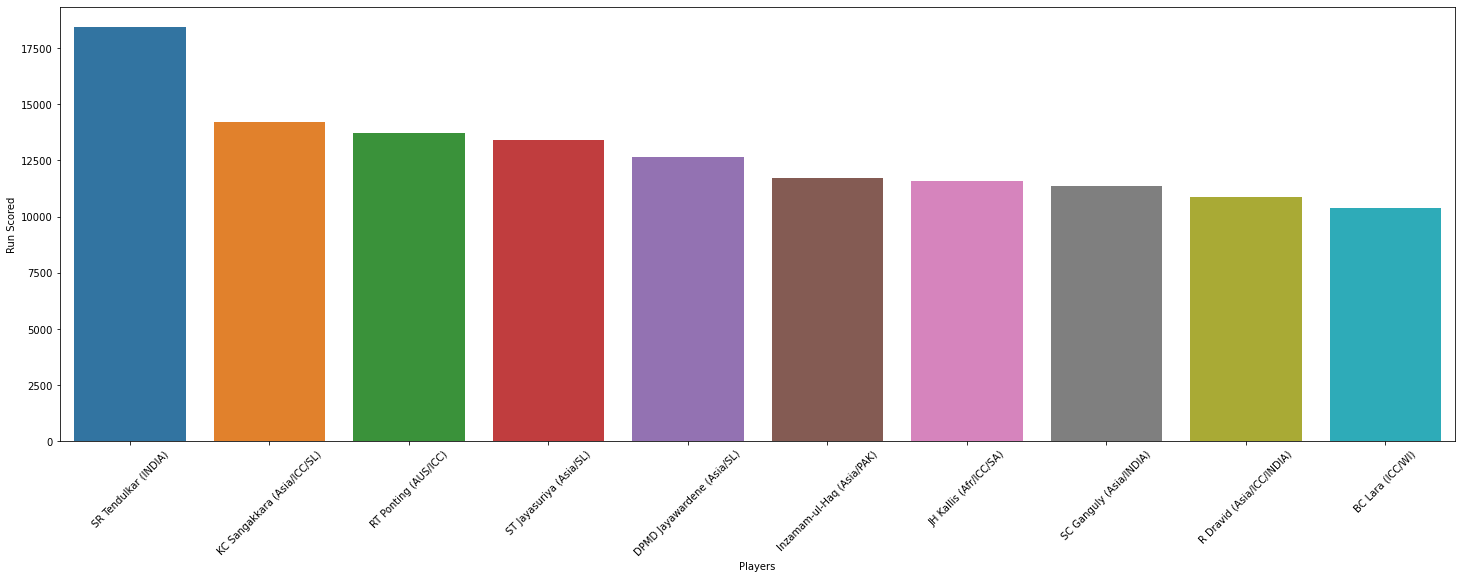

In [24]:
# Top 10 player for highest runs
plt.figure(figsize=(25,8))
top10_run= df[['Player','Runs']].sort_values('Runs',ascending=False).head(10)
sns.barplot(x='Player',y='Runs',data=top10_run)
plt.xlabel('Players')
plt.ylabel('Run Scored')
plt.xticks(rotation=45)
plt.show()

In [25]:
df['HS'].dtype

dtype('O')

In [26]:
df['HS'].unique()

array(['200*', '169', '164', '189', '144', '137*', '139', '183', '153',
       '161*', '141*', '172', '183*', '153*', '162*', '145', '215', '194',
       '150', '152*', '132*', '173', '219', '175', '124', '134*', '130',
       '120*', '131*', '119*', '159', '102', '145*', '141', '108*',
       '188*', '143', '189*', '142*', '139*', '127*', '122', '174*',
       '181*', '166', '121', '140*', '124*', '113*', '185*', '154',
       '116*', '112', '237*', '109*', '264', '119', '144*', '150*',
       '133*', '96*', '156'], dtype=object)

In [27]:
df['HS']= df['HS'].str.replace('*','')

In [28]:
df['HS'].unique()

array(['200', '169', '164', '189', '144', '137', '139', '183', '153',
       '161', '141', '172', '162', '145', '215', '194', '150', '152',
       '132', '173', '219', '175', '124', '134', '130', '120', '131',
       '119', '159', '102', '108', '188', '143', '142', '127', '122',
       '174', '181', '166', '121', '140', '113', '185', '154', '116',
       '112', '237', '109', '264', '133', '96', '156'], dtype=object)

In [29]:
df['HS']=df['HS'].astype(int)
df['HS'].dtype

dtype('int32')

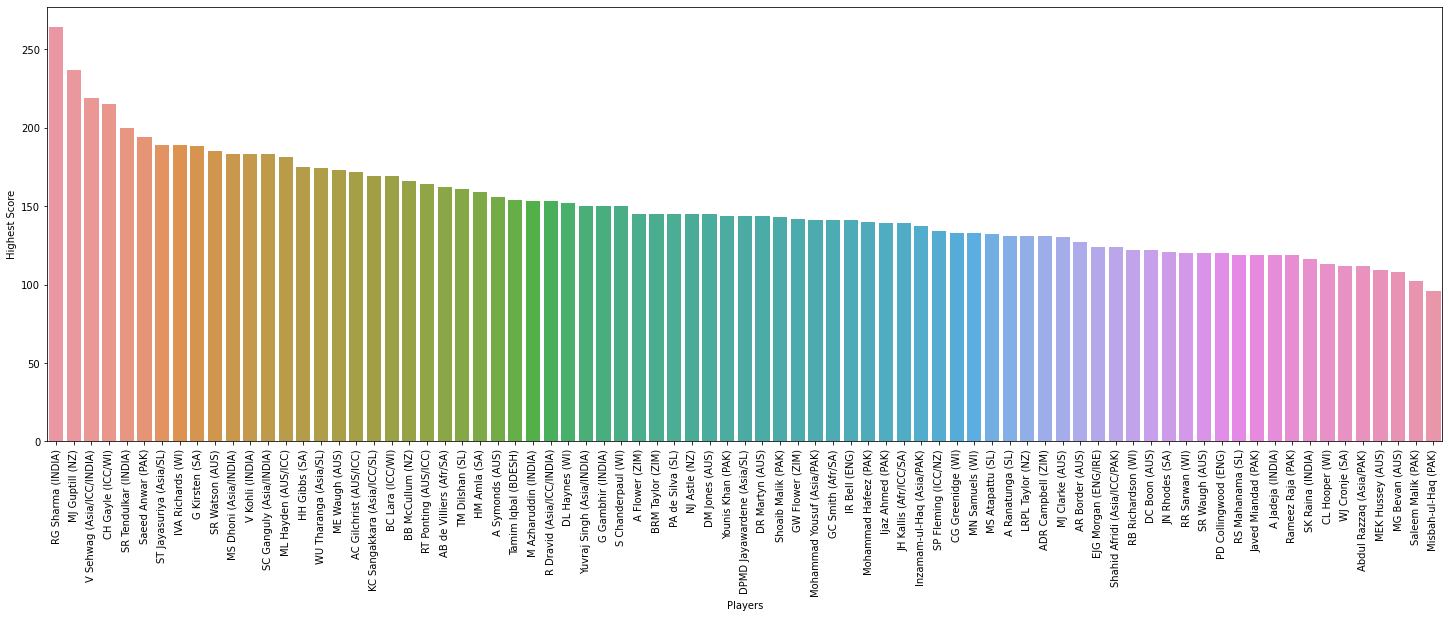

In [30]:
# HS--> Highest Score

plt.figure(figsize=(25,8))
bats_HS = df[['Player','HS']].sort_values('HS', ascending=False)
sns.barplot(x='Player',y='HS',data=bats_HS)
plt.xlabel('Players')
plt.ylabel('Highest Score')
plt.xticks(rotation=90)
plt.show()

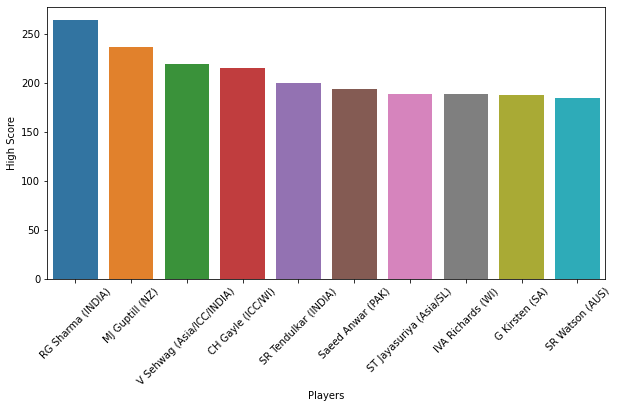

In [31]:
# Top 10 high score:

plt.figure(figsize=(10,5))
top10_HS_bats = df[['Player','HS']].sort_values('HS', ascending=False).head(10)
sns.barplot(x='Player',y='HS', data=top10_HS_bats)
plt.xlabel('Players')
plt.ylabel('High Score')
plt.xticks(rotation=45)
plt.show()

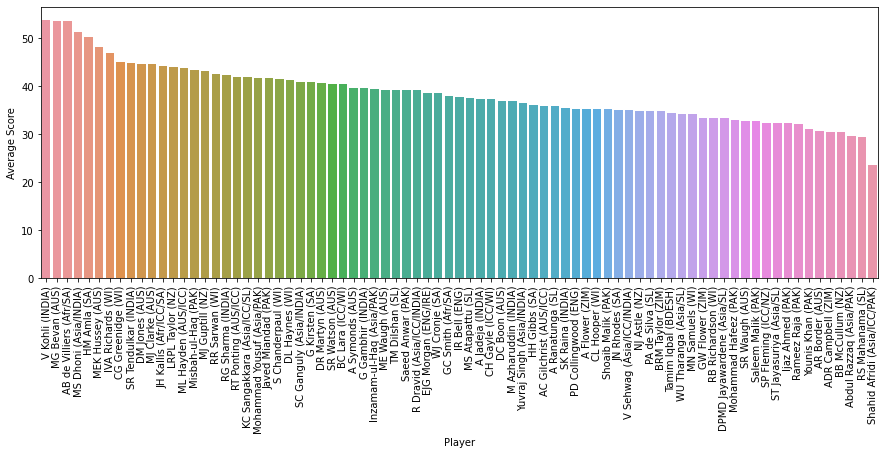

In [32]:
# Average score of the Players:

plt.figure(figsize=(15,5))
Ave_score= df[['Player','Ave']].sort_values('Ave', ascending=False)
sns.barplot(x='Player', y='Ave', data=Ave_score)
plt.xlabel('Player')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

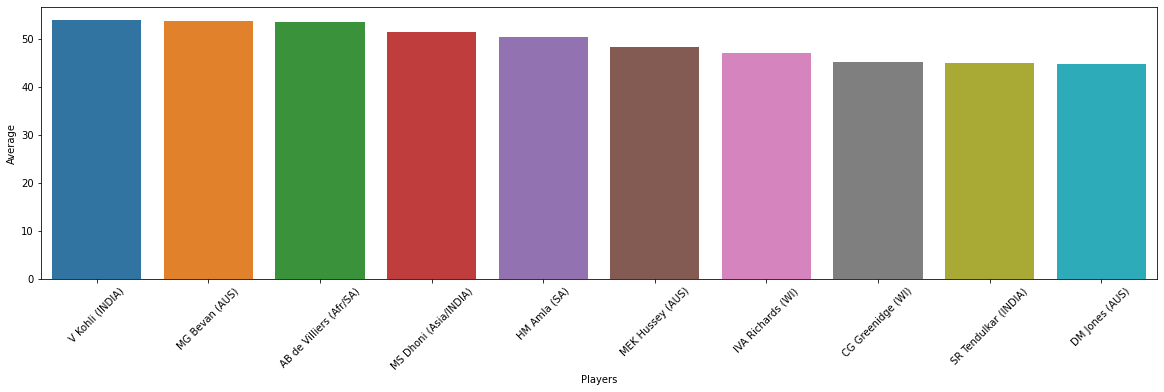

In [33]:
plt.figure(figsize=(20,5))
top10_avg = df[['Player','Ave']].sort_values('Ave', ascending=False).head(10)
sns.barplot(x='Player', y='Ave', data=top10_avg)
plt.xlabel('Players')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

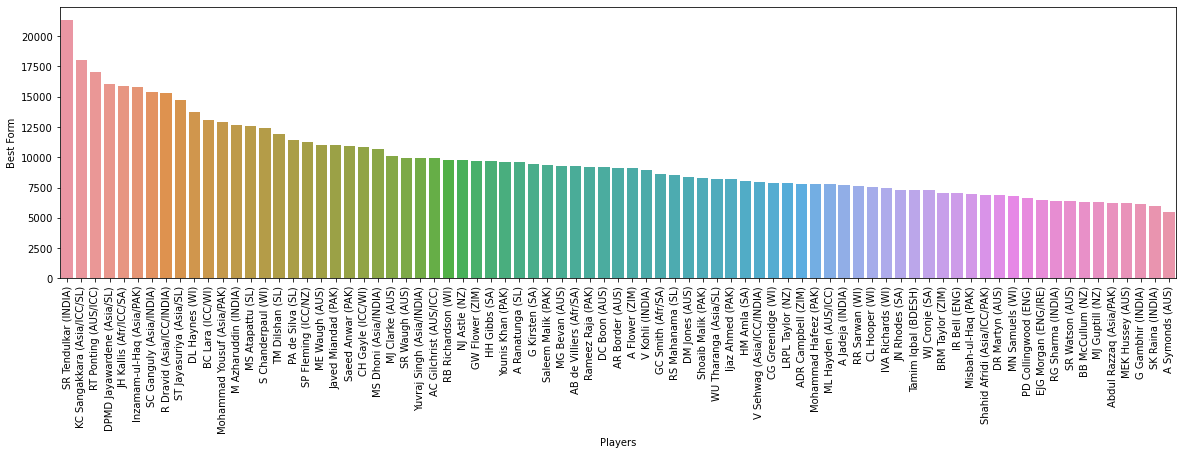

In [34]:
# BF--> Best Form of the Players   --> Bowl Faced

plt.figure(figsize=(20,5))
bf_bats = df[['Player','BF']].sort_values('BF', ascending=False)
sns.barplot(x='Player', y='BF', data=bf_bats)
plt.xlabel('Players')
plt.ylabel('Best Form')
plt.xticks(rotation=90)
plt.show()

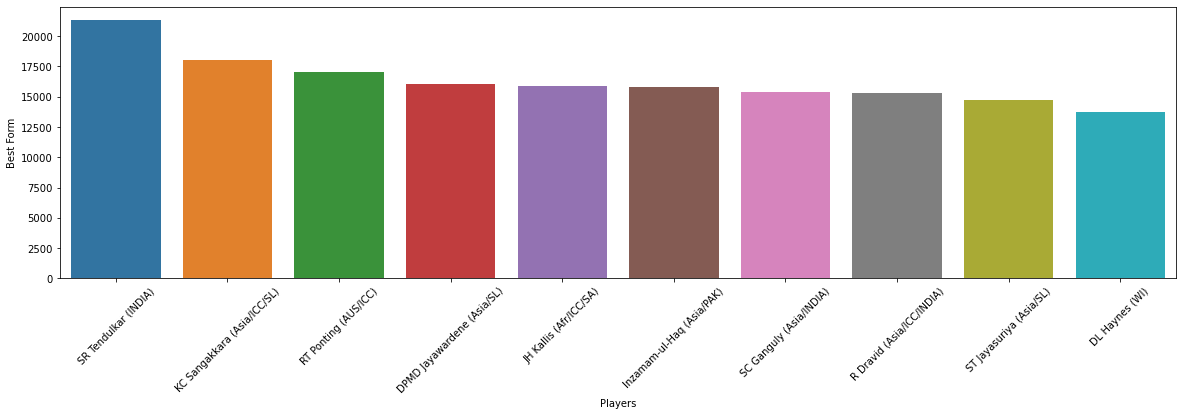

In [35]:
plt.figure(figsize=(20,5))
top10_BF = df[['Player', 'BF']].sort_values('BF', ascending=False).head(10)
sns.barplot(x='Player', y='BF', data=top10_BF)
plt.xlabel('Players')
plt.ylabel('Best Form')
plt.xticks(rotation=45)
plt.show()

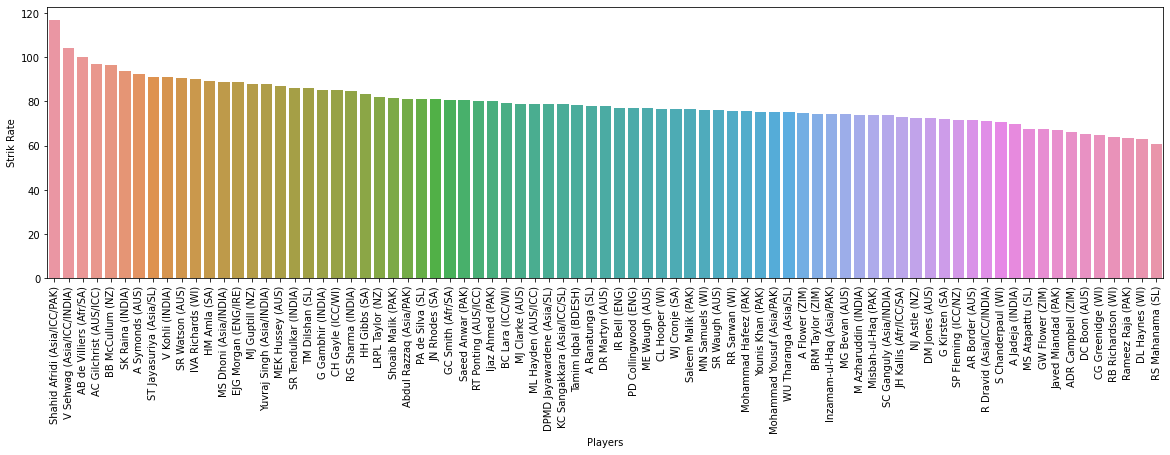

In [36]:
# SR--> Strik Rate

plt.figure(figsize=(20,5))
SR_bats = df[['Player','SR']].sort_values('SR', ascending=False)
sns.barplot(x='Player', y='SR', data=SR_bats)
plt.xlabel('Players')
plt.ylabel('Strik Rate')
plt.xticks(rotation=90)
plt.show()

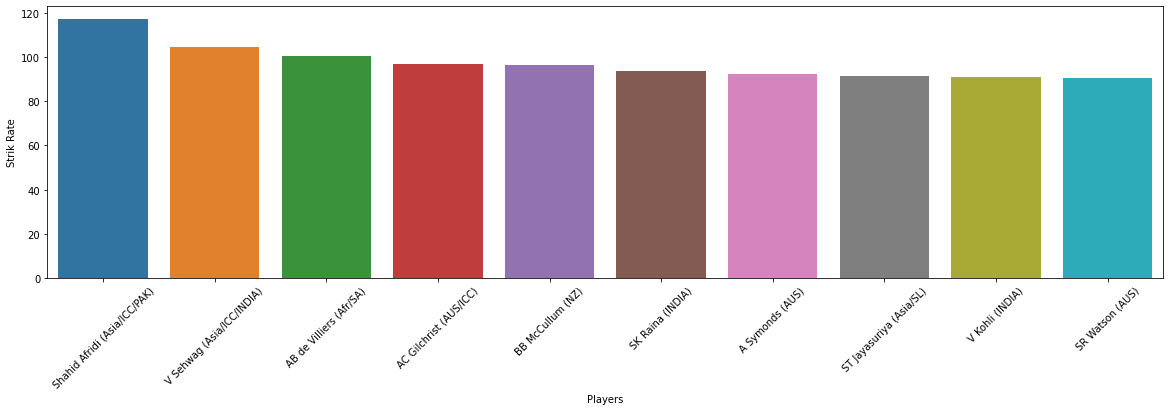

In [37]:
plt.figure(figsize=(20,5))
top10_SR = df[['Player','SR']].sort_values('SR', ascending=False).head(10)
sns.barplot(x='Player', y='SR', data=top10_SR)
plt.xlabel('Players')
plt.ylabel('Strik Rate')
plt.xticks(rotation=45)
plt.show()

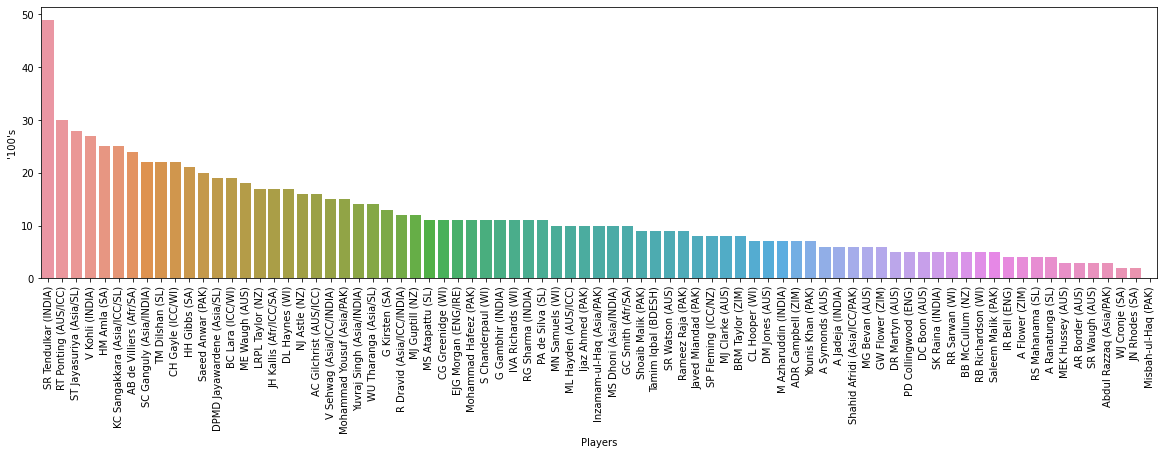

In [38]:
plt.figure(figsize=(20,5))
run_100s = df[['Player','100']].sort_values('100', ascending=False)
sns.barplot(x='Player', y='100', data=run_100s)
plt.xlabel('Players')
plt.ylabel("'100's")
plt.xticks(rotation=90)
plt.show()

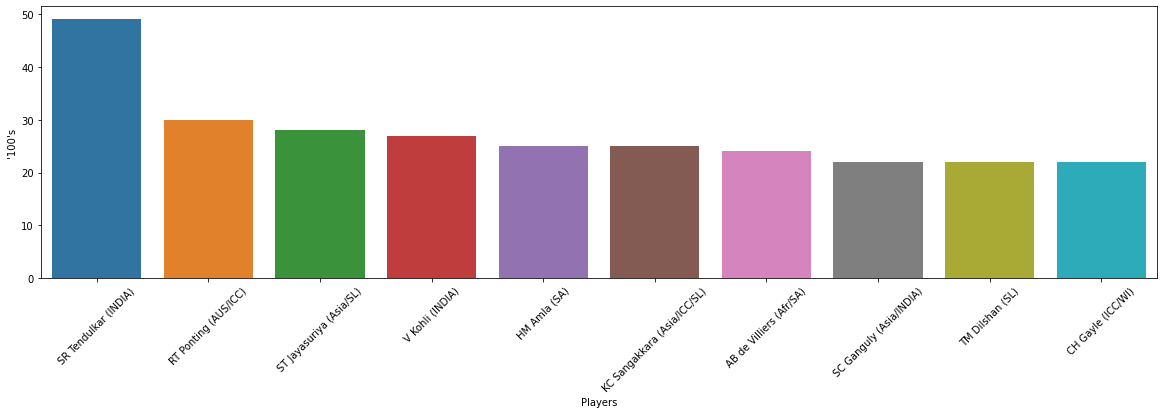

In [39]:
plt.figure(figsize=(20,5))
top10run_100s = df[['Player','100']].sort_values('100', ascending=False).head(10)
sns.barplot(x='Player', y='100', data=top10run_100s)
plt.xlabel('Players')
plt.ylabel("'100's")
plt.xticks(rotation=45)
plt.show()

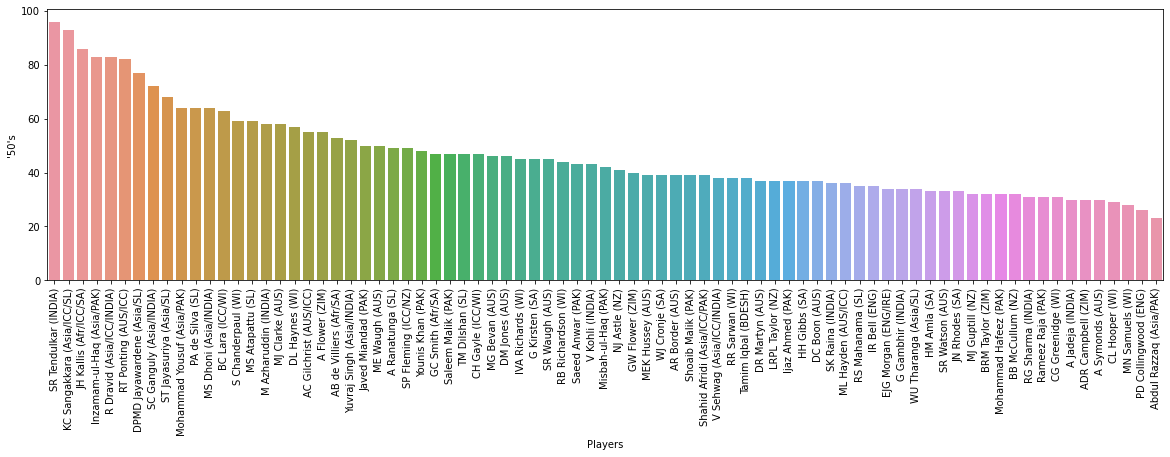

In [40]:
plt.figure(figsize=(20,5))
run_50s = df[['Player','50']].sort_values('50', ascending=False)
sns.barplot(x='Player', y='50', data=run_50s)
plt.xlabel('Players')
plt.ylabel("'50's")
plt.xticks(rotation=90)
plt.show()

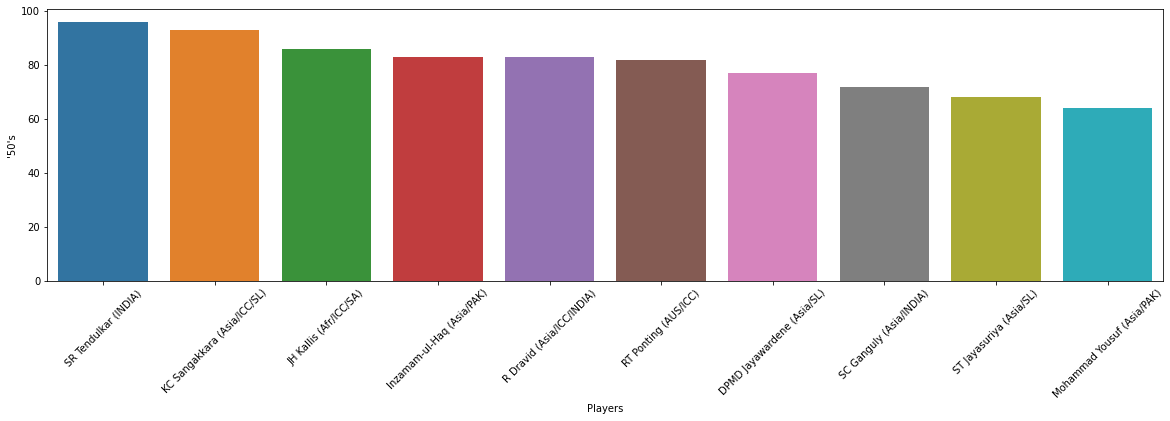

In [41]:
plt.figure(figsize=(20,5))
top10run_50s = df[['Player','50']].sort_values('50', ascending=False).head(10)
sns.barplot(x='Player', y='50', data=top10run_50s)
plt.xlabel('Players')
plt.ylabel("'50's")
plt.xticks(rotation=45)
plt.show()

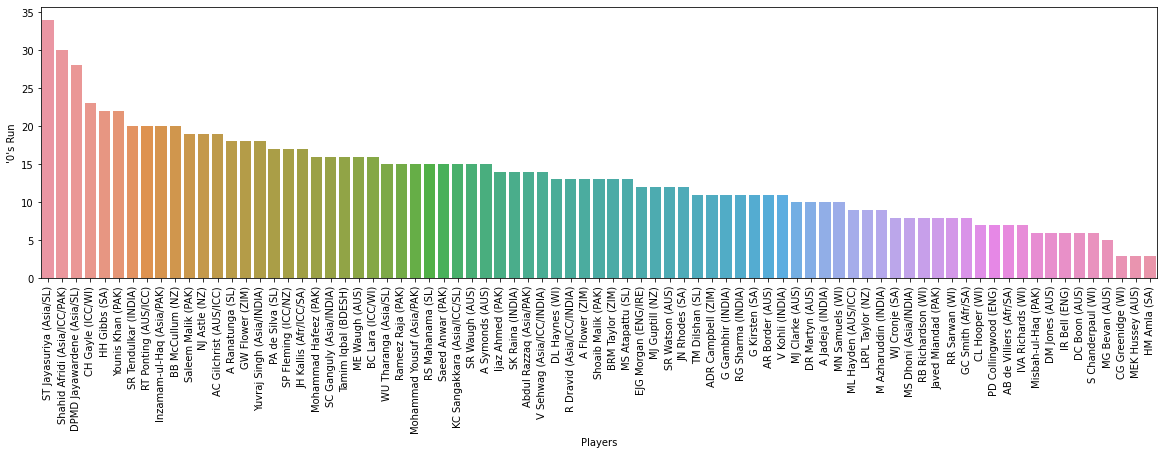

In [42]:
# 0's run 

plt.figure(figsize=(20,5))
run_0s = df[['Player','0']].sort_values('0', ascending=False)
sns.barplot(x='Player', y='0', data=run_0s)
plt.xlabel('Players')
plt.ylabel("'0's Run")
plt.xticks(rotation=90)
plt.show()

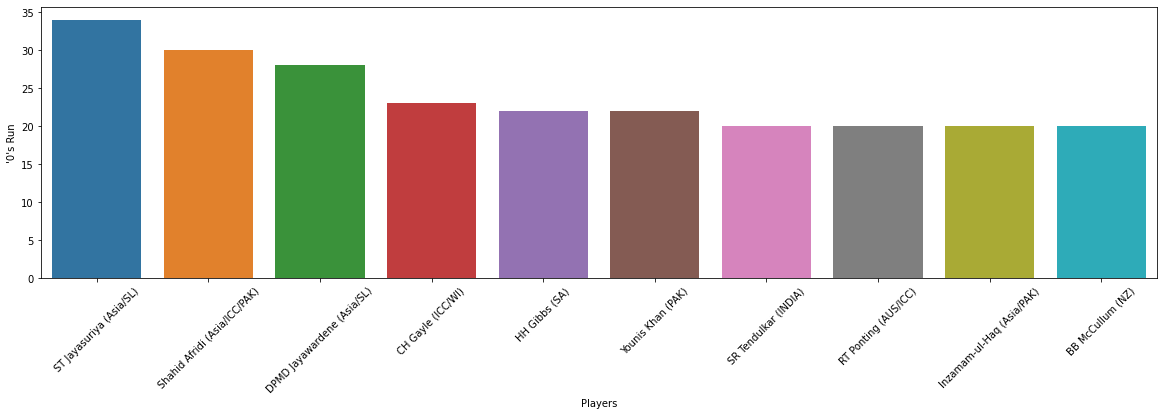

In [43]:
plt.figure(figsize=(20,5))
top10_run_0s = df[['Player','0']].sort_values('0', ascending=False).head(10)
sns.barplot(x='Player', y='0', data=top10_run_0s)
plt.xlabel('Players')
plt.ylabel("'0's Run")
plt.xticks(rotation=45)
plt.show()

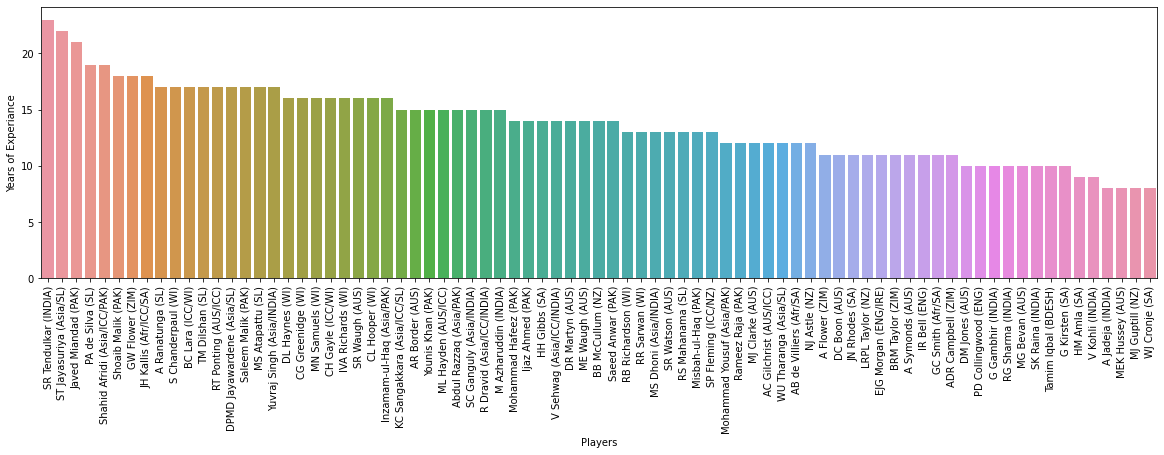

In [44]:
# Most Experiance Player

plt.figure(figsize=(20,5))
Exp_bats = df[['Player','Exp']].sort_values('Exp', ascending=False)
sns.barplot(x='Player', y='Exp', data=Exp_bats)
plt.xlabel('Players')
plt.ylabel('Years of Experiance')
plt.xticks(rotation=90)
plt.show()

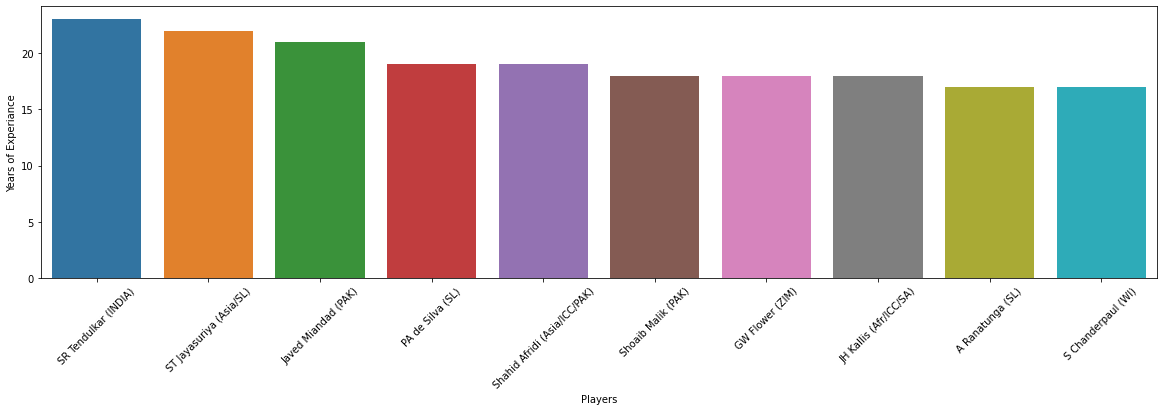

In [45]:
# Top 10 Most Experiance Player
plt.figure(figsize=(20,5))
Exp_bats = df[['Player','Exp']].sort_values('Exp', ascending=False).head(10)
sns.barplot(x='Player', y='Exp', data=Exp_bats)
plt.xlabel('Players')
plt.ylabel('Years of Experiance')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.corr()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
Mat,1.000000,0.990661,0.433992,0.864500,0.089757,-0.204473,0.798576,0.183694,0.466574,0.777884,0.673924,0.687774
Inns,0.990661,1.000000,0.338788,0.896270,0.137518,-0.210776,0.838206,0.152891,0.530225,0.800381,0.697878,0.698699
NO,0.433992,0.338788,1.000000,0.260526,-0.312561,0.241971,0.275283,-0.019291,-0.121577,0.350533,-0.101977,0.233812
Runs,0.864500,0.896270,0.260526,1.000000,0.335049,0.172331,0.936736,0.146401,0.776243,0.914436,0.497139,0.589688
HS,0.089757,0.137518,-0.312561,0.335049,1.000000,0.250068,0.192006,0.388540,0.568856,0.180646,0.222399,0.051748
Ave,-0.204473,-0.210776,0.241971,0.172331,0.250068,1.000000,0.132089,0.098574,0.345500,0.240353,-0.536602,-0.238810
BF,0.798576,0.838206,0.275283,0.936736,0.192006,0.132089,1.000000,-0.196835,0.658980,0.933328,0.402524,0.584006
SR,0.183694,0.152891,-0.019291,0.146401,0.388540,0.098574,-0.196835,1.000000,0.257617,-0.047072,0.271291,0.000201
100,0.466574,0.530225,-0.121577,0.776243,0.568856,0.345500,0.658980,0.257617,1.000000,0.557369,0.338982,0.338881
50,0.777884,0.800381,0.350533,0.914436,0.180646,0.240353,0.933328,-0.047072,0.557369,1.000000,0.357128,0.505346


In [47]:
# Check the correlation coefficient to see which variales are highly correlated.

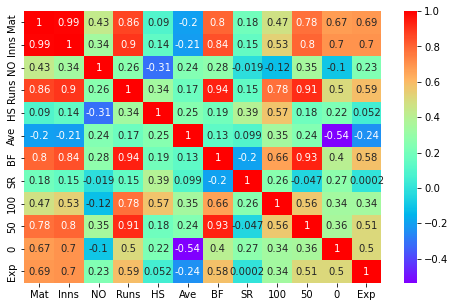

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()

In [49]:
# In heatmap we can see,
# Mat and Inns has more correlation with 0.99
# Mat and Run has also more correlated with 0.86
# Runs and Inns are also more correlated with 0.90

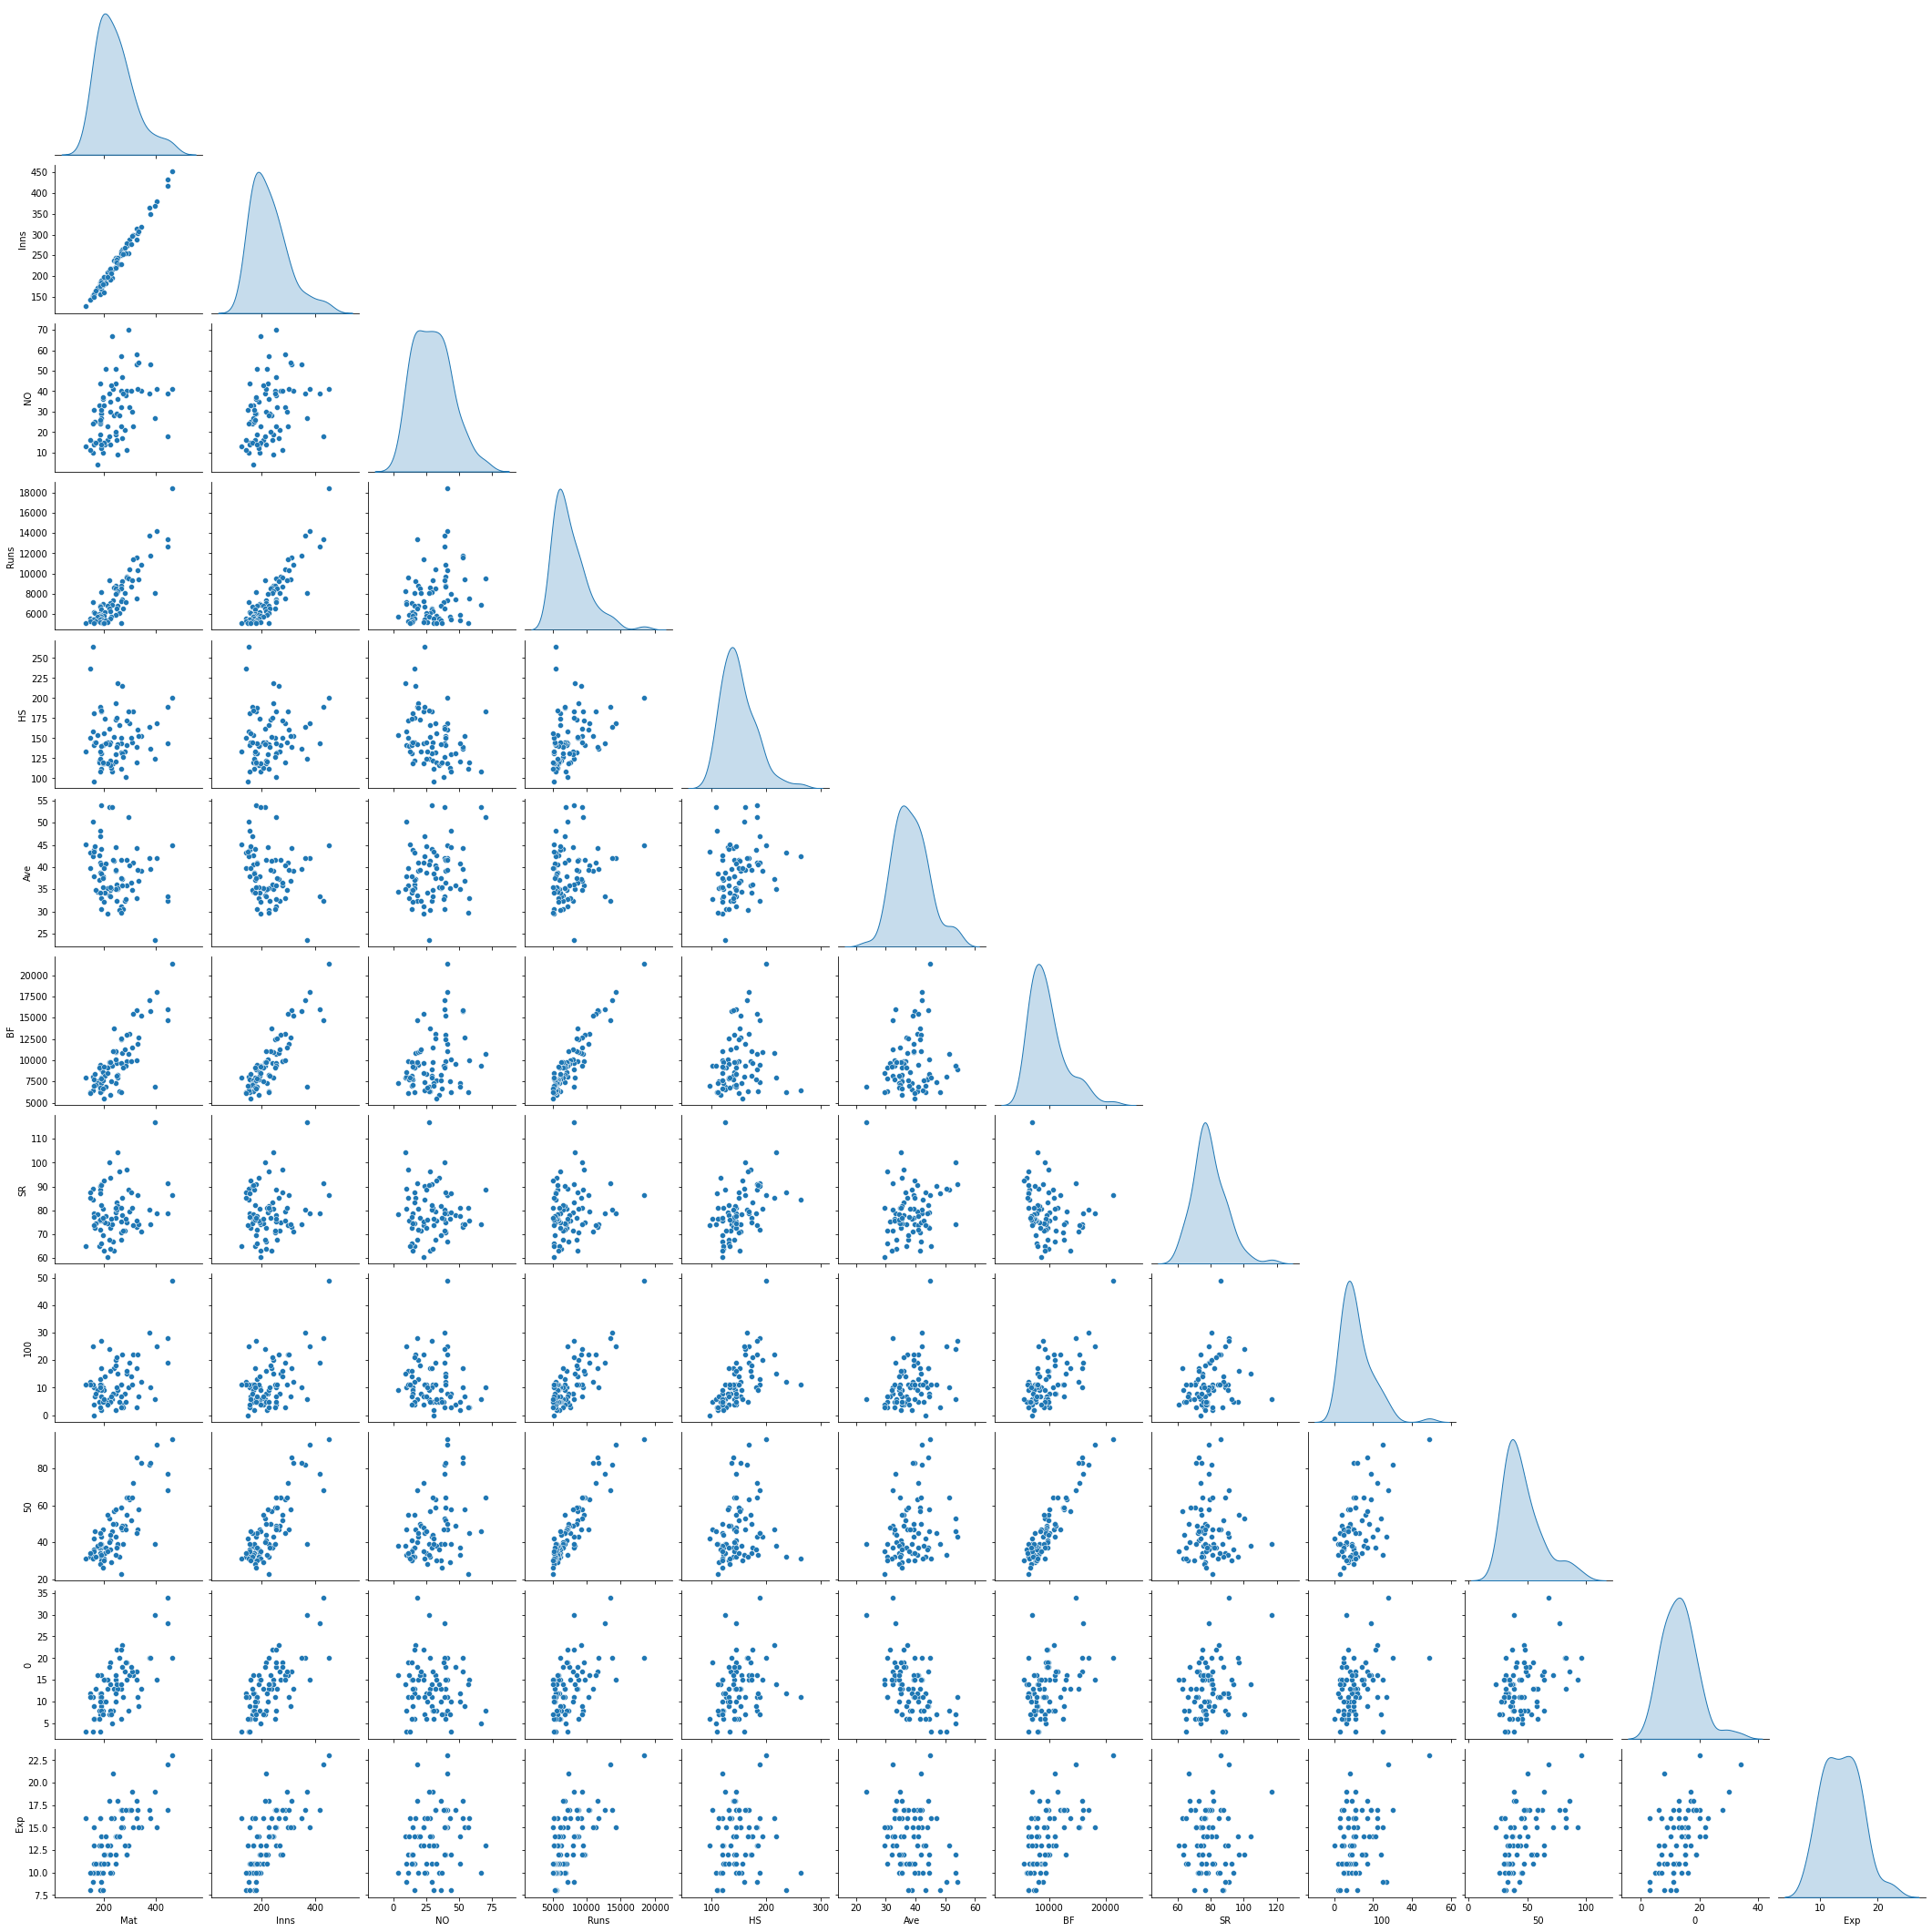

In [50]:
sns.pairplot(df,corner=True,diag_kind='kde')
plt.show()

Outliers Analysis:

In [51]:
df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,149.253165,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,31.285070,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,96.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,125.500000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,144.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,167.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,264.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000,23.000000


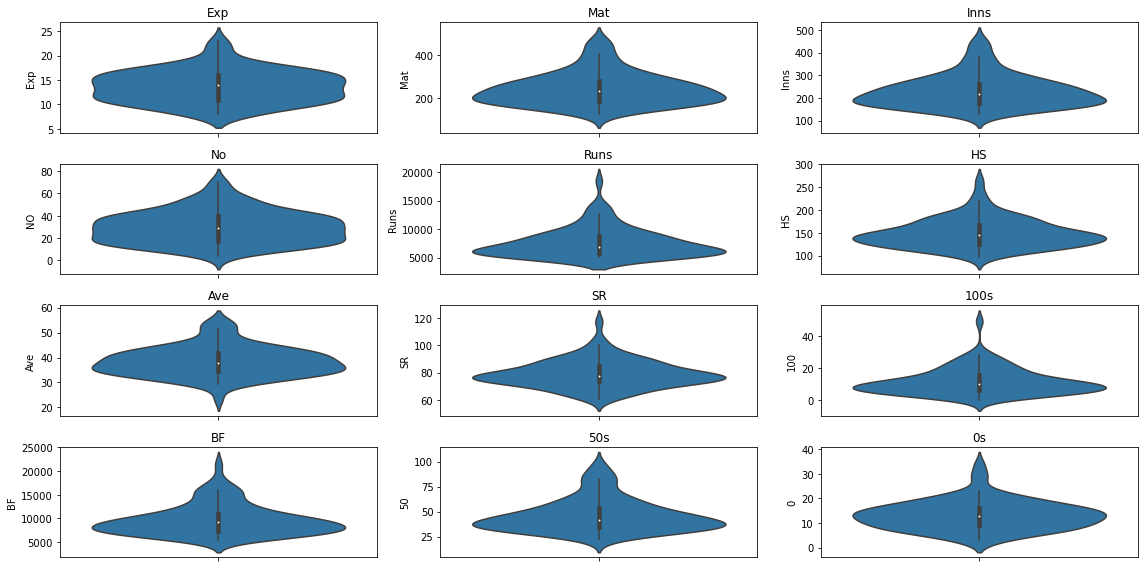

In [52]:
f, axes=plt.subplots(4,3, figsize=(16,8))
sns.violinplot(y=df['Exp'],ax=axes[0,0])
axes[0,0].set_title('Exp')

sns.violinplot(y=df['Mat'], ax=axes[0,1])
axes[0,1].set_title('Mat')

sns.violinplot(y=df['Inns'], ax=axes[0,2])
axes[0,2].set_title('Inns')

sns.violinplot(y=df.NO, ax=axes[1,0])
axes[1,0].set_title('No')

sns.violinplot(y=df.Runs, ax=axes[1,1])
axes[1,1].set_title('Runs')

sns.violinplot(y=df.HS, ax=axes[1,2])
axes[1,2].set_title('HS')

sns.violinplot(y=df.Ave, ax=axes[2,0])
axes[2,0].set_title('Ave')


sns.violinplot(y=df.SR, ax=axes[2,1])
axes[2,1].set_title('SR')

sns.violinplot(y=df['100'], ax=axes[2,2])
axes[2,2].set_title('100s')

sns.violinplot(y=df['BF'], ax=axes[3,0])
axes[3,0].set_title('BF')

sns.violinplot(y=df['50'], ax=axes[3,1])
axes[3,1].set_title('50s')

sns.violinplot(y=df['0'], ax=axes[3,2])
axes[3,2].set_title('0s')

plt.tight_layout()

Now, plot histogram for each continuous variable.

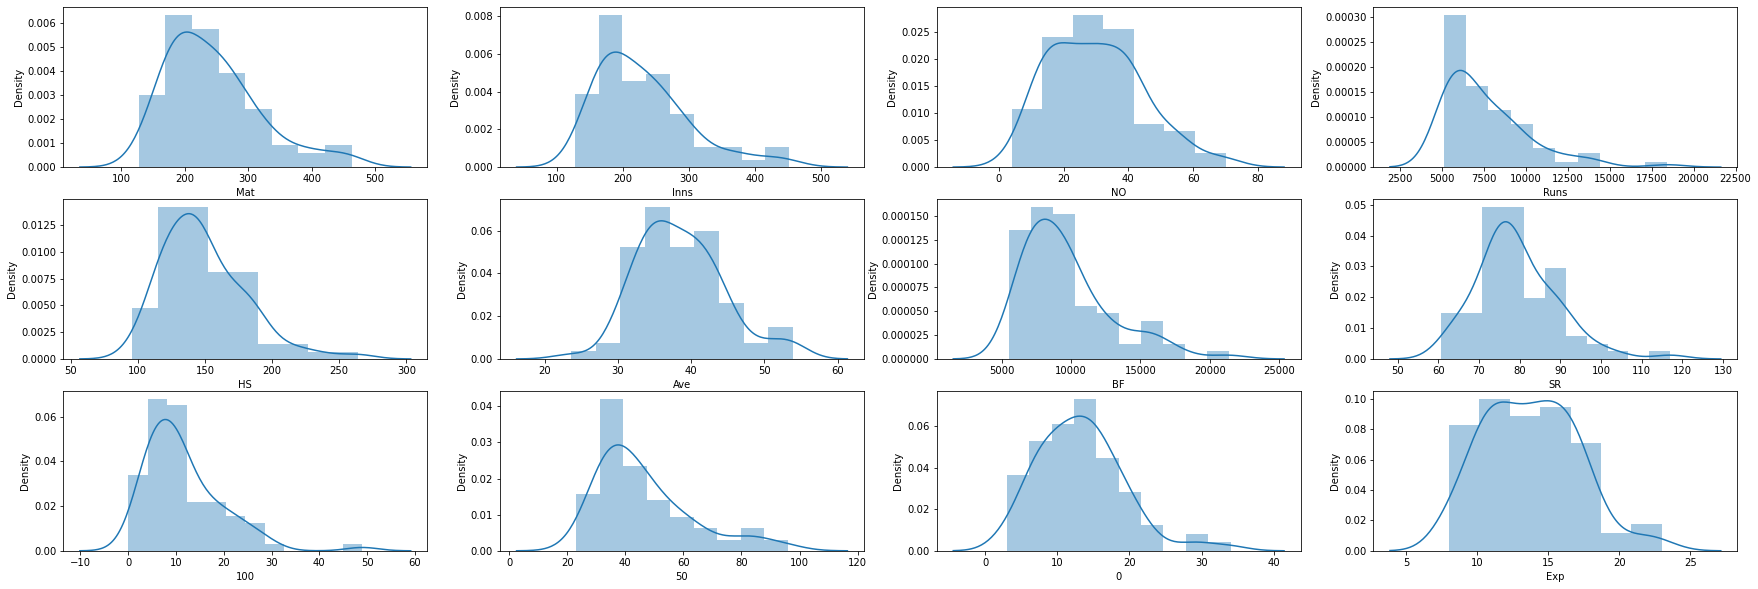

In [53]:
plt.figure(figsize=(30,10))
features=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]])

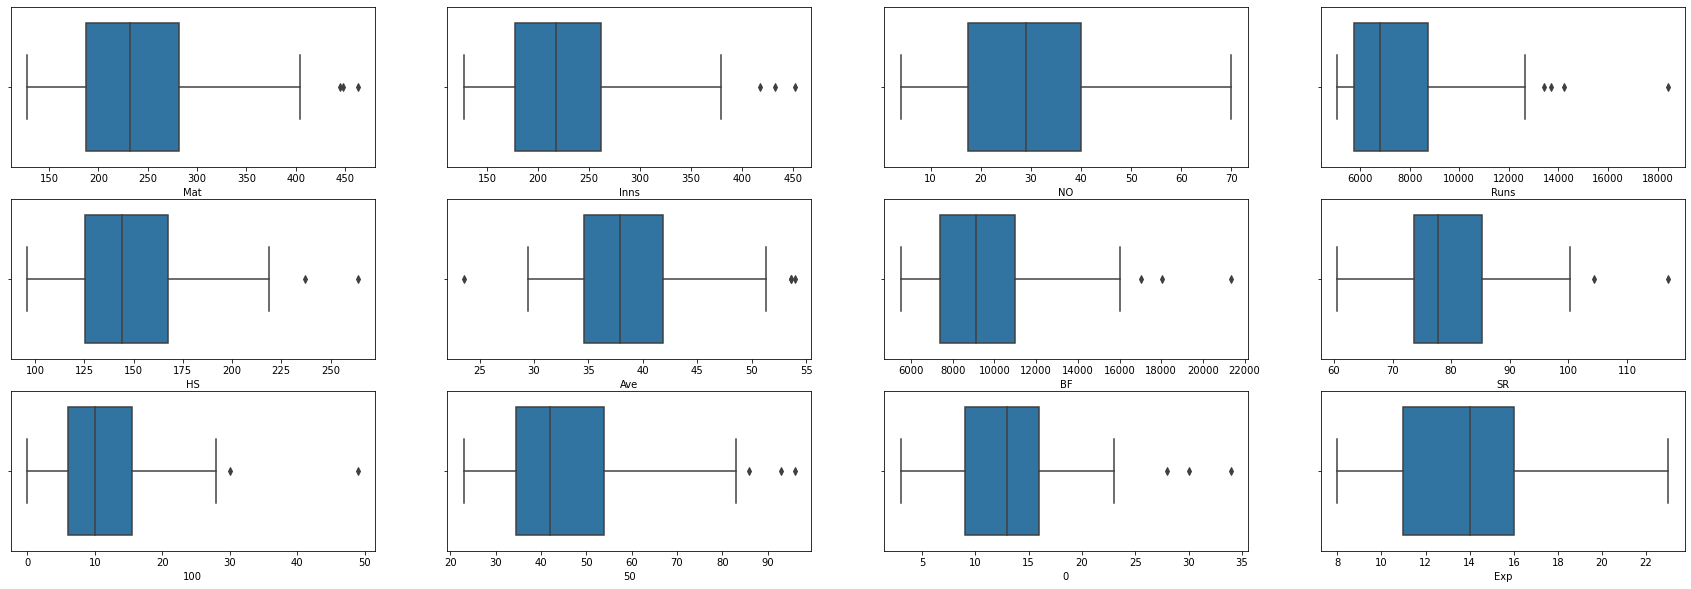

In [54]:
plt.figure(figsize=(30,10))
features=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(df[i[1]])

Percentile capping for outliers handling

In [55]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

In [56]:
Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

In [57]:
Q3=df.Runs.quantile(0.99)
Q1= df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

In [58]:
Q3=df.HS.quantile(0.99)
Q1=df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

In [59]:
Q3=df.Ave.quantile(0.99)
Q1=df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

In [60]:
Q3=df.BF.quantile(0.99)
Q1=df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

In [61]:
Q3=df.SR.quantile(0.99)
Q1=df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

In [62]:
Q3=df.Exp.quantile(0.99)
Q1=df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

In [63]:
Q3=df['100'].quantile(0.99)
Q1=df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

In [64]:
Q3=df['50'].quantile(0.99)
Q1=df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

In [65]:
Q3=df['0'].quantile(0.99)
Q1=df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3

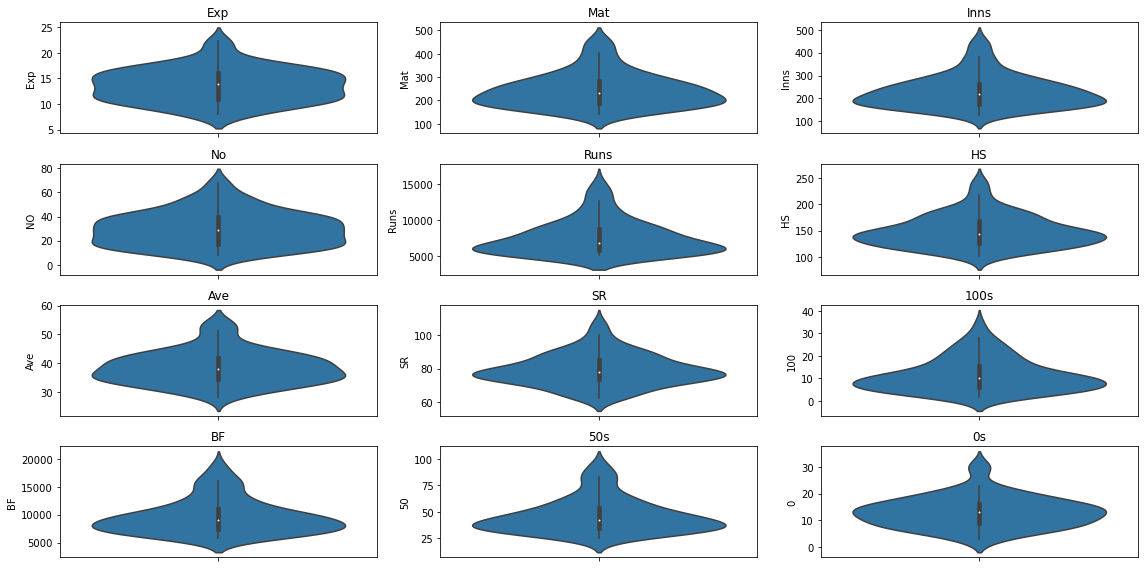

In [66]:
f, axes=plt.subplots(4,3, figsize=(16,8))
sns.violinplot(y=df['Exp'],ax=axes[0,0])
axes[0,0].set_title('Exp')

sns.violinplot(y=df['Mat'], ax=axes[0,1])
axes[0,1].set_title('Mat')

sns.violinplot(y=df['Inns'], ax=axes[0,2])
axes[0,2].set_title('Inns')

sns.violinplot(y=df.NO, ax=axes[1,0])
axes[1,0].set_title('No')

sns.violinplot(y=df.Runs, ax=axes[1,1])
axes[1,1].set_title('Runs')

sns.violinplot(y=df.HS, ax=axes[1,2])
axes[1,2].set_title('HS')

sns.violinplot(y=df.Ave, ax=axes[2,0])
axes[2,0].set_title('Ave')


sns.violinplot(y=df.SR, ax=axes[2,1])
axes[2,1].set_title('SR')

sns.violinplot(y=df['100'], ax=axes[2,2])
axes[2,2].set_title('100s')

sns.violinplot(y=df['BF'], ax=axes[3,0])
axes[3,0].set_title('BF')

sns.violinplot(y=df['50'], ax=axes[3,1])
axes[3,1].set_title('50s')

sns.violinplot(y=df['0'], ax=axes[3,2])
axes[3,2].set_title('0s')

plt.tight_layout()

In [67]:
# Dropping Player field final dataframe will only contain data columns.

In [68]:
df_drop=df.copy()
Player=df_drop.pop('Player')

In [69]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,452,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [70]:
Player.head()

0           SR Tendulkar (INDIA)
1    KC Sangakkara (Asia/ICC/SL)
2           RT Ponting (AUS/ICC)
3        ST Jayasuriya (Asia/SL)
4     DPMD Jayawardene (Asia/SL)
Name: Player, dtype: object

In [71]:
# Rescaling the dataframe:

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()

In [74]:
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.82279967e+00,  3.16933340e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.13891509e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.92424461e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.89741746e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.68274698e+00,  6.3124829

In [75]:
Final_df = pd.DataFrame(df_scaled, columns=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0','Exp'])
Final_df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,3.169333,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.138915,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.924245,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.897417,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.682747,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


### Model Building : KMeans Clustering

Finding the optimal number of Clusters.

Elbow curve to get right number of clusters-

In [76]:
# Elbow curve method to find the ideal number of cluster.

In [77]:
clusters=list(range(2,8))

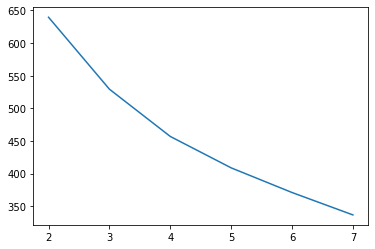

In [78]:
ssd=[]
for num_clusters in clusters:
        model_cluster= KMeans(n_clusters=num_clusters, max_iter=150, random_state=50)
        model_cluster.fit(Final_df)
        ssd.append(model_cluster.inertia_)
        
plt.plot(clusters, ssd)

Looking at the above Elbow curve, looks good to proceed 4 cluster.

In [79]:
from sklearn.metrics import silhouette_score

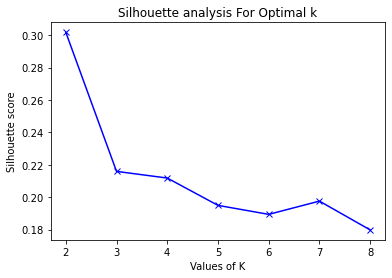

In [80]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(Final_df)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(Final_df, cluster_labels))
    
    #silhouette_avg = silhouette_score(Final_df, cluster_labels)
    #print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [81]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 4, 7, 6, 7, 6, 4, 4, 6, 6, 6,
       6, 4, 4, 0, 4, 2, 2, 7, 2, 2, 6, 2, 0, 2, 5, 5, 7, 0, 5, 2, 0, 5,
       2, 2, 0, 5, 5, 0, 2, 3, 5, 3, 5, 5, 3, 3, 3, 0, 5, 3, 3, 0, 3, 0,
       3, 3, 3, 5, 0, 5, 5, 5, 3, 3, 3, 0, 2])

We see that the silhouette score is maximized at k = 3. So, we will take 3 clusters.

NOTE: The silhouette Method is used in combination with the Elbow Method for a more confident decision.

In [82]:
# Here we will perform Elbow method.
# That's why, We will opt 4 cluster for decision making.

In [83]:
cluster=KMeans(n_clusters=4, max_iter=150, random_state=50)
cluster.fit(Final_df)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [84]:
cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
# Assign the label

In [86]:
df['Cluster_ID']= cluster.labels_

In [87]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_ID
0,SR Tendulkar (INDIA),451.3,452,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,3
1,KC Sangakkara (Asia/ICC/SL),404.0,380,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,3
2,RT Ponting (AUS/ICC),375.0,365,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,3
3,ST Jayasuriya (Asia/SL),445.0,433,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,3
4,DPMD Jayawardene (Asia/SL),448.0,418,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,3


In [88]:
# Number of counts for each clusters

In [89]:
df['Cluster_ID'].value_counts(ascending=False)

2    33
1    27
0    10
3     9
Name: Cluster_ID, dtype: int64

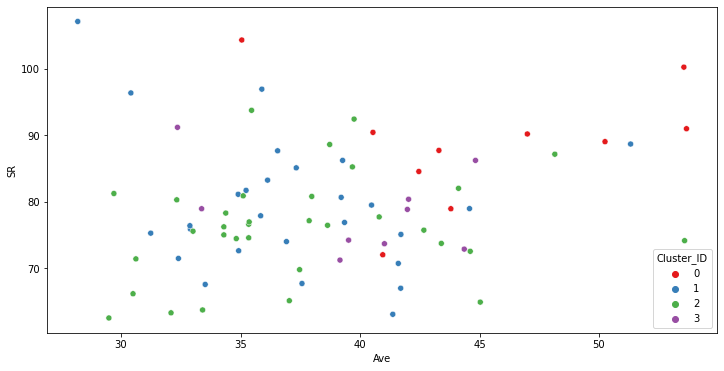

In [90]:
# Visulaize the scatter plot between Ave and SR
plt.figure(figsize=(12,6))
sns.scatterplot(x='Ave',y='SR', hue='Cluster_ID',data=df, legend='full', palette='Set1')
plt.show()

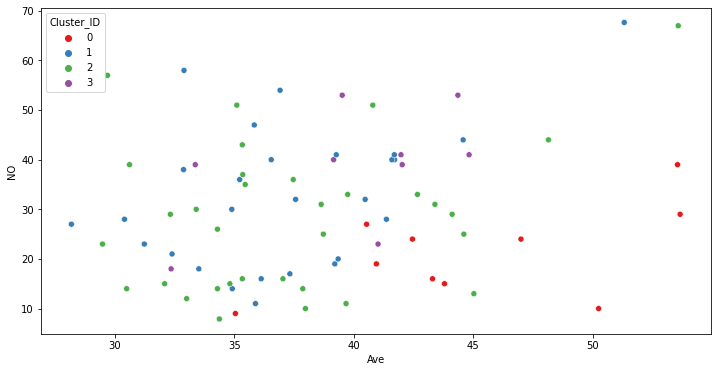

In [91]:
# Visulaize the scatter plot between Ave and NO 
plt.figure(figsize=(12,6))
sns.scatterplot(x='Ave', y='NO', hue='Cluster_ID',data=df, legend='full', palette='Set1')
plt.show()

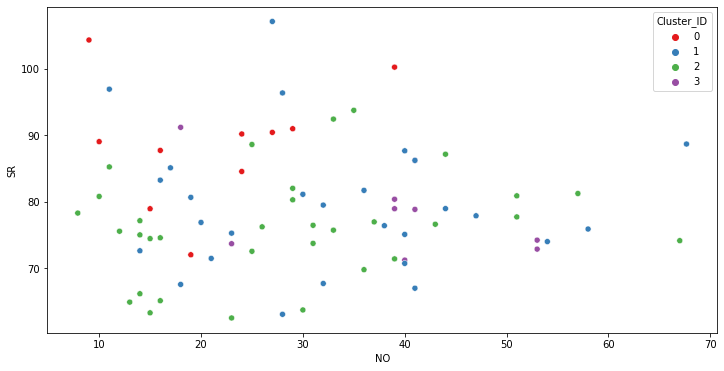

In [92]:
# Visulaize the scatter plot between NO and SR
plt.figure(figsize=(12,6))
sns.scatterplot(x='NO', y='SR', hue='Cluster_ID', data=df, legend='full', palette='Set1')
plt.show()

In [93]:
# Violin plot on original attribute to visualize the spread of data.

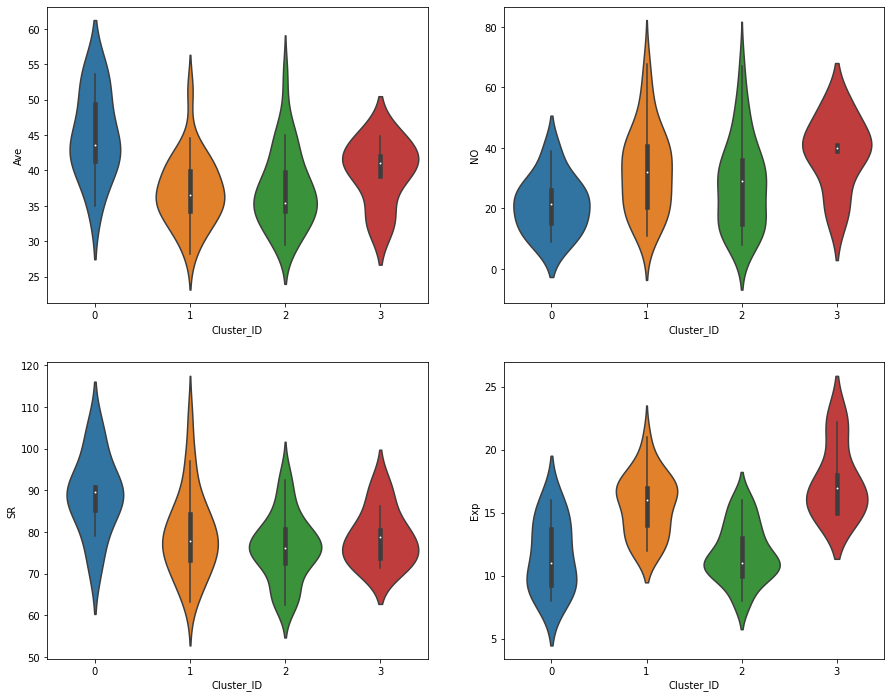

In [94]:
f, axes=plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x='Cluster_ID', y='Ave', data=df, ax=axes[0][0])
sns.violinplot(x='Cluster_ID', y='NO', data=df, ax=axes[0][1])
sns.violinplot(x='Cluster_ID', y='SR', data=df, ax=axes[1][0])
sns.violinplot(x='Cluster_ID', y='Exp', data=df, ax=axes[1][1])
plt.show()

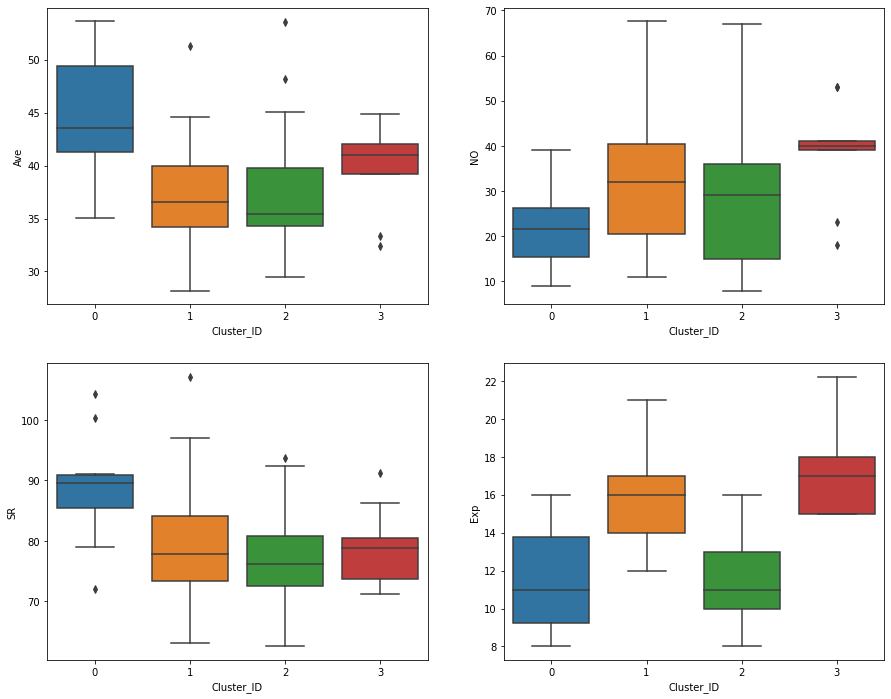

In [95]:
f, axes=plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x='Cluster_ID', y='Ave', data=df, ax=axes[0][0])
sns.boxplot(x='Cluster_ID', y='NO', data=df, ax=axes[0][1])
sns.boxplot(x='Cluster_ID', y='SR', data=df, ax=axes[1][0])
sns.boxplot(x='Cluster_ID', y='Exp', data=df, ax=axes[1][1])
plt.show()

In [96]:
df[['NO','Ave','SR','Cluster_ID']].groupby('Cluster_ID').mean()

,NO,Ave,SR
Cluster_ID,,,
0,21.200000,45.055920,88.855000
1,32.691111,37.163244,79.451756
2,28.269697,37.426667,76.210776
3,38.555556,39.847778,78.634444


<AxesSubplot:xlabel='Cluster_ID'>

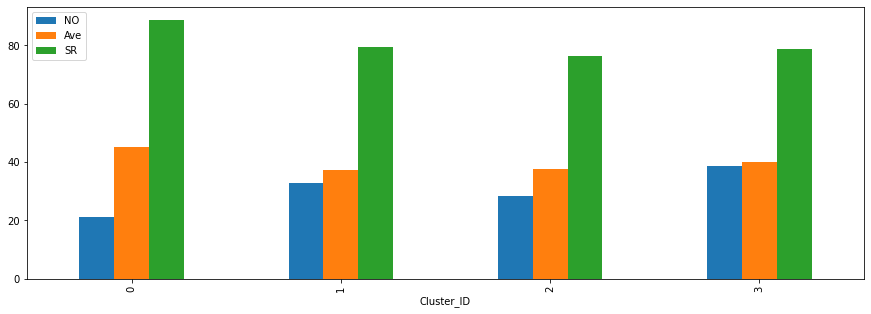

In [97]:
df[['NO','Ave','SR','Cluster_ID']].groupby('Cluster_ID').mean().plot(kind='bar',figsize=(15,5))

In [98]:
# Can be batsman coach
df[df['Cluster_ID']==0].sort_values(by=['NO','Ave','SR'], ascending=[True, False, False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_ID
24,V Sehwag (Asia/ICC/INDIA),251.0,245,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,0
34,HM Amla (SA),156.0,153,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,0
49,ML Hayden (AUS/ICC),161.0,155,15.0,6133.0,181.0,43.80,7767.0,78.96,10.0,36.0,9.0,15.0,0
63,MJ Guptill (NZ),146.0,143,16.0,5500.0,237.0,43.30,6269.0,87.73,12.0,32.0,12.0,8.0,0
39,G Kirsten (SA),185.0,185,19.0,6798.0,188.0,40.95,9436.0,72.04,13.0,45.0,11.0,10.0,0


In [99]:
df[df['Cluster_ID']==1].sort_values(by=['NO','Ave','SR'],ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_ID
12,AC Gilchrist (AUS/ICC),287.0,279,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,1
36,NJ Astle (NZ),223.0,217,14.0,7090.0,145.0,34.92,9760.0,72.64,16.0,41.0,19.0,12.0,1
26,HH Gibbs (SA),248.0,240,16.0,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,22.0,14.0,1
17,CH Gayle (ICC/WI),269.0,264,17.0,9221.0,215.0,37.33,10834.0,85.11,22.0,47.0,23.0,16.0,1
43,GW Flower (ZIM),221.0,214,18.0,6571.0,142.0,33.52,9723.0,67.58,6.0,40.0,18.0,18.0,1


In [100]:
df[df['Cluster_ID']==2].sort_values(by=['NO','Ave','SR'], ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_ID
60,Tamim Iqbal (BDESH),173.00,171,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,2
37,GC Smith (Afr/SA),197.00,194,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,2
70,G Gambhir (INDIA),147.00,143,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,2
54,Mohammad Hafeez (PAK),190.00,190,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,2
74,CG Greenidge (WI),142.04,127,13.0,5134.0,133.0,45.03,7908.0,64.92,11.0,31.0,3.0,16.0,2


In [101]:
df[df['Cluster_ID']==3].sort_values(by=['NO','Ave','SR'], ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_ID
3,ST Jayasuriya (Asia/SL),445.0,433,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,30.88,22.0,3
7,SC Ganguly (Asia/INDIA),311.0,300,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.00,15.0,3
2,RT Ponting (AUS/ICC),375.0,365,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.00,17.0,3
4,DPMD Jayawardene (Asia/SL),448.0,418,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.00,17.0,3
8,R Dravid (Asia/ICC/INDIA),344.0,318,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.00,15.0,3


In [102]:
     #END#